<a href="https://colab.research.google.com/github/rjsdn31536/titanic_kaggle/blob/master/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# Predict survival on the Titanic with ML(Kaggle competition)

## Data 로딩 및 분석

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
train_file = "/gdrive/My Drive/colab/titanic_kaggle/data/train.csv"
test_file = "/gdrive/My Drive/colab/titanic_kaggle/data/test.csv"

data_train = pd.read_csv(train_file, engine='python')
data_test = pd.read_csv(test_file, engine='python')

data_train.Cabin[339] = 'C'

In [4]:
print(data_train.shape)
print(data_test.shape)

(891, 12)
(418, 11)


In [5]:
display(data_train.head())
display(data_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### feature
 - survival : 생존 유무
 - pclass : 티켓 등급
 - sec : 성별
 - age : 나이
 - sibsp : 동승한 형제자매, 배우자 수
 - parch : 동승한 부모, 자녀 수
 - ticket : 티켓 번호
 - cabin : 객실 번호
 - bembarked : 탑승 항구

## Null value 확인

In [6]:
print(data_train.shape)
data_train.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print(data_test.shape)
data_test.isnull().sum()

(418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

확인해보면 age, cabin에 대한 null value가 상당부분 존재한다. 이를 조금 후에 처리해주자

## Data 분석

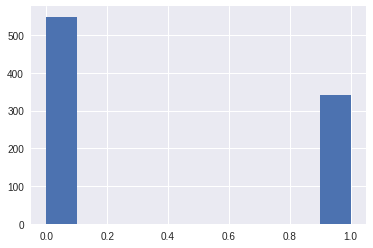

In [8]:
plt.hist(data_train["Survived"])
plt.show()

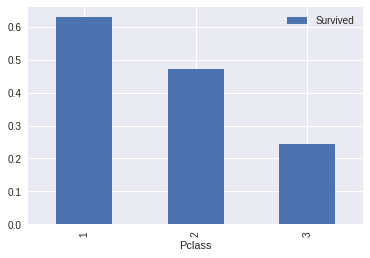

In [9]:
data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

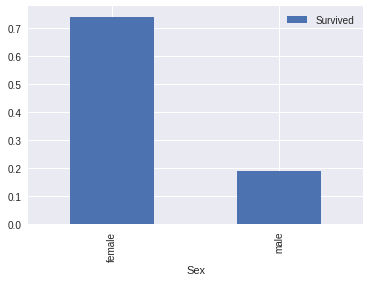

In [10]:
data_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar()

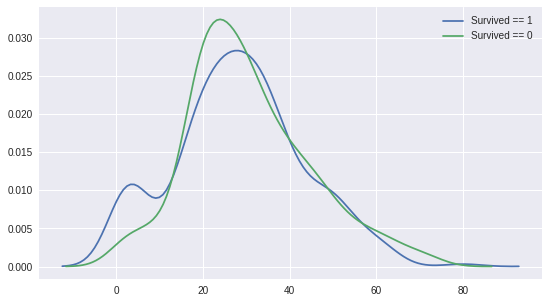

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(data_train[data_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(data_train[data_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

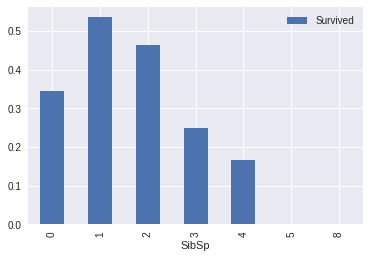

In [12]:
data_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().plot.bar()

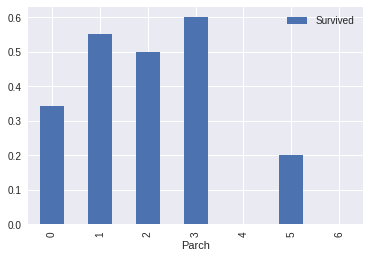

In [13]:
data_train[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().plot.bar()

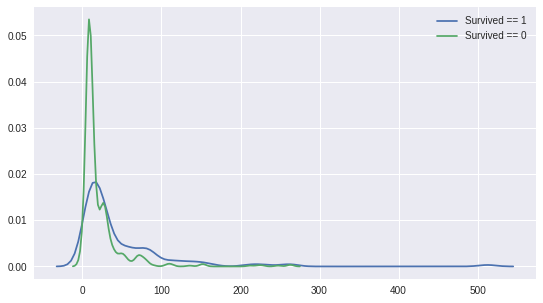

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(data_train[data_train['Survived'] == 1]['Fare'], ax=ax)
sns.kdeplot(data_train[data_train['Survived'] == 0]['Fare'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

### Cabin 결측치를 예측하여 채우기

In [0]:
for i in data_train.index:
  if type(data_train['Cabin'][i]) == str:
    if 'A' in data_train['Cabin'][i]:
      data_train['Cabin'][i] = 'A'
    if 'B' in data_train['Cabin'][i]:
      data_train['Cabin'][i] = 'B'
    if 'C' in data_train['Cabin'][i]:
      data_train['Cabin'][i] = 'C'
    if 'D' in data_train['Cabin'][i]:
      data_train['Cabin'][i] = 'D'
    if 'E' in data_train['Cabin'][i]:
      data_train['Cabin'][i] = 'E'
    if 'F' in data_train['Cabin'][i]:
      data_train['Cabin'][i] = 'F'
    if 'G' in data_train['Cabin'][i]:
      data_train['Cabin'][i] = 'G'
    
for i in data_test.index:
  if type(data_test['Cabin'][i]) == str:
    if 'A' in data_test['Cabin'][i]:
      data_test['Cabin'][i] = 'A'
    if 'B' in data_test['Cabin'][i]:
      data_test['Cabin'][i] = 'B'
    if 'C' in data_test['Cabin'][i]:
      data_test['Cabin'][i] = 'C'
    if 'D' in data_test['Cabin'][i]:
      data_test['Cabin'][i] = 'D'
    if 'E' in data_test['Cabin'][i]:
      data_test['Cabin'][i] = 'E'
    if 'F' in data_test['Cabin'][i]:
      data_test['Cabin'][i] = 'F'
    if 'G' in data_test['Cabin'][i]:
      data_test['Cabin'][i] = 'G'

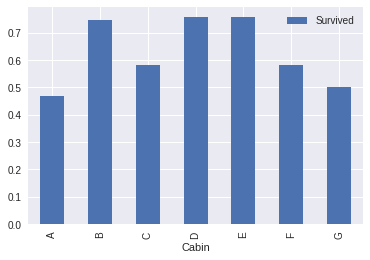

In [16]:
data_train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=True).mean().plot.bar()

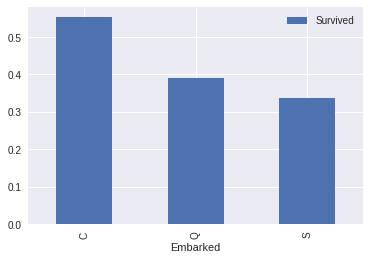

In [17]:
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar()

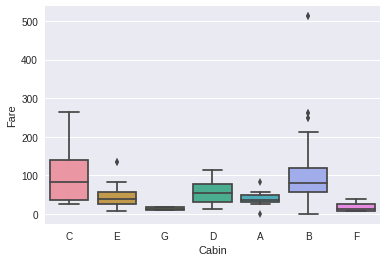

In [18]:
sns.boxplot(x='Cabin', y='Fare', data=data_train)

In [0]:
del_idx = data_train[data_train.Cabin.isnull() == True].index 
data_train.drop(del_idx, axis = 0, inplace = True)

del_idx = data_test[data_test.Cabin.isnull() == True].index
data_test.drop(del_idx, axis = 0, inplace = True)

In [0]:
y_train = data_train['Survived']
x_train = data_train.drop(['Survived'], axis=1)
x_test = data_test

In [21]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A,S


In [0]:
y_train = x_train['Cabin']
y_test = x_test['Cabin']

In [23]:
x_train = x_train.drop(['Cabin'], axis = 1)
x_test = x_test.drop(['Cabin'], axis = 1)
x_train = x_train.drop(['Name'], axis = 1)
x_test = x_test.drop(['Name'], axis = 1)
x_train = x_train.drop(['PassengerId'], axis = 1)
x_test = x_test.drop(['PassengerId'], axis = 1)
x_train = x_train.drop(['Ticket'], axis = 1)
x_test = x_test.drop(['Ticket'], axis = 1)
x_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,female,38.0,1,0,71.2833,C
3,1,female,35.0,1,0,53.1000,S
6,1,male,54.0,0,0,51.8625,S
10,3,female,4.0,1,1,16.7000,S
11,1,female,58.0,0,0,26.5500,S


In [24]:
  print(x_train.shape)
  x_train.isnull().sum()

(204, 7)


Pclass       0
Sex          0
Age         19
SibSp        0
Parch        0
Fare         0
Embarked     2
dtype: int64

In [0]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [0]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [27]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1
6,1,54.0,0,0,51.8625,0,1,0,0,1
10,3,4.0,1,1,16.7000,1,0,0,0,1
11,1,58.0,0,0,26.5500,1,0,0,0,1


In [28]:
y_train.head()

,A,B,C,D,E,F,G
1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0
10,0,0,0,0,0,0,1
11,0,0,1,0,0,0,0


In [0]:
y_train_np = np.array(y_train)
y_train_num = np.where(y_train_np == 1)[1]

In [30]:
display(x_train.head())
display(y_train_num)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1
6,1,54.0,0,0,51.8625,0,1,0,0,1
10,3,4.0,1,1,16.7000,1,0,0,0,1
11,1,58.0,0,0,26.5500,1,0,0,0,1


array([2, 2, 4, 6, 2, 3, 0, 2, 1, 3, 1, 2, 1, 2, 5, 5, 2, 4, 0, 3, 3, 2,
       1, 4, 3, 4, 3, 2, 1, 5, 2, 4, 1, 0, 2, 5, 0, 5, 1, 1, 6, 0, 3, 3,
       2, 2, 2, 3, 6, 2, 1, 4, 1, 2, 2, 2, 3, 0, 1, 3, 2, 2, 1, 4, 2, 2,
       4, 2, 1, 2, 4, 2, 3, 1, 2, 2, 2, 4, 2, 5, 2, 5, 2, 4, 3, 1, 4, 2,
       1, 3, 6, 2, 4, 2, 4, 1, 2, 0, 2, 2, 2, 4, 3, 4, 4, 3, 0, 1, 2, 1,
       2, 3, 2, 1, 2, 4, 3, 5, 1, 1, 2, 1, 1, 1, 2, 2, 0, 4, 2, 4, 4, 2,
       0, 4, 1, 3, 0, 2, 5, 3, 3, 3, 0, 1, 1, 3, 0, 3, 4, 2, 1, 1, 3, 1,
       1, 2, 5, 2, 4, 4, 2, 2, 2, 5, 2, 4, 4, 1, 1, 3, 2, 1, 1, 3, 4, 1,
       1, 3, 4, 5, 1, 1, 3, 1, 3, 1, 0, 4, 1, 1, 4, 1, 4, 2, 2, 3, 4, 3,
       0, 3, 1, 2, 1, 2])

In [32]:
y_train_num.shape

(204,)

In [33]:
import xgboost as xgb

model =xgb.XGBClassifier()

model.fit(x_train, y_train_num)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_test_np = np.array(y_test)
y_test_num = np.where(y_test_np == 1)[1]

In [0]:
correct_prediction = np.equal(y_pred, y_test_num)

In [37]:
len(np.where(correct_prediction ==  True)[0])

47

In [38]:
correct_prediction.shape

(91,)

In [39]:
y_train.head()

,A,B,C,D,E,F,G
1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0
10,0,0,0,0,0,0,1
11,0,0,1,0,0,0,0


In [40]:
y_test.head()

,A,B,C,D,E,F,G
12,0,1,0,0,0,0,0
14,0,0,0,0,1,0,0
24,0,1,0,0,0,0,0
26,0,1,0,0,0,0,0
28,1,0,0,0,0,0,0


In [41]:
y_pred

array([2, 4, 1, 1, 2, 1, 2, 2, 2, 3, 1, 2, 5, 1, 1, 2, 2, 2, 2, 2, 4, 2,
       4, 1, 4, 5, 2, 2, 6, 3, 1, 2, 1, 0, 2, 2, 4, 0, 4, 5, 1, 2, 3, 1,
       0, 2, 2, 2, 2, 5, 4, 3, 2, 1, 2, 2, 3, 2, 2, 5, 4, 4, 4, 2, 1, 2,
       2, 5, 4, 5, 2, 4, 1, 1, 4, 2, 4, 1, 1, 4, 2, 1, 4, 1, 1, 2, 2, 3,
       2, 2, 2])

In [42]:
y_test_num

array([1, 4, 1, 1, 0, 2, 3, 3, 0, 3, 2, 2, 5, 1, 1, 2, 2, 3, 2, 2, 2, 2,
       1, 2, 2, 5, 0, 2, 6, 2, 2, 2, 1, 4, 2, 2, 3, 1, 2, 5, 4, 4, 3, 1,
       4, 2, 0, 1, 2, 5, 2, 3, 2, 4, 3, 2, 2, 2, 1, 4, 0, 3, 1, 2, 1, 2,
       1, 4, 5, 5, 0, 2, 1, 3, 4, 2, 4, 4, 1, 0, 2, 1, 3, 2, 1, 2, 3, 3,
       2, 2, 2])